In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Explore listings

In [110]:
listings_df = pd.read_csv('./listings.csv')
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [117]:
# Columns that have $ in every rows are monetary columns, turn these into floats
for col in listings_df.select_dtypes('object').columns:
    if listings_df[col].str.contains("\$").mean() == 1:
        listings_df[col] = listings_df[col].replace('[\$,]', '', regex=True).astype(float)

In [118]:
cat_cols = listings_df.select_dtypes('object').columns
num_cols = listings_df.select_dtypes(['float', 'int']).columns

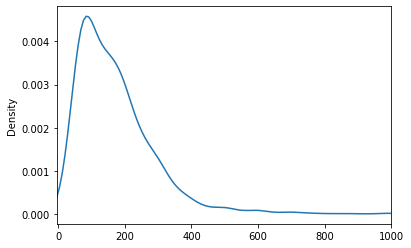

In [131]:
listings_df['price'].plot.kde(xlim=(-5,1000))

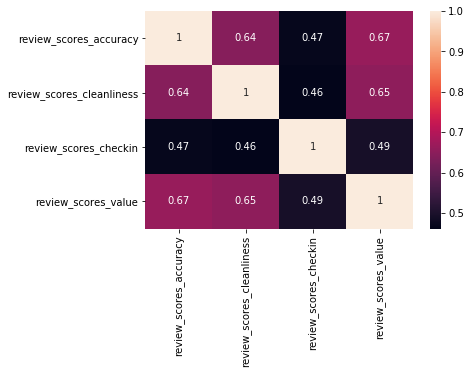

In [10]:
sns.heatmap(listings_df[['price', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_value']].corr(),annot=True);

# Explore Prices

In [11]:
def get_daytype(date):
    if date.weekday() <= 4:
        return 'weekday'
    else:
        return 'weekend' 

In [12]:
price_df = pd.read_csv('./calendar.csv', parse_dates=['date'])

# Remove listings that don't have a price
price_df.dropna(subset=['price'], inplace=True) 

# Convert price from object with '$' and ',' to float
price_df['price'] = price_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Only one value ('t') as listed price means it's available
price_df.drop('available', axis=1, inplace=True) 
price_df.head()

# Add features for day types, e.g. month
price_df['month'] = price_df['date'].dt.month
price_df['dayofweek'] = price_df['date'].dt.dayofweek # Numbered day of week, Monday=0, ..., Sunday=6
price_df['daytype'] = price_df['dayofweek'].apply(lambda x: 'weekday' if x <=4 else 'weekend')

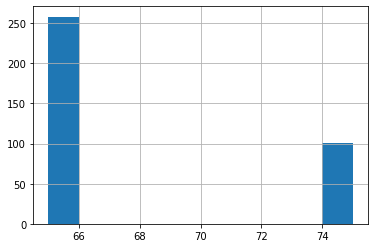

In [33]:
price_df[price_df['listing_id']==3075044].set_index('date')['price'].hist()

In [16]:
price_df.head()

,listing_id,date,price,month,dayofweek,daytype
365,3075044,2017-08-22,65.0,8,1,weekday
366,3075044,2017-08-21,65.0,8,0,weekday
367,3075044,2017-08-20,65.0,8,6,weekend
368,3075044,2017-08-19,75.0,8,5,weekend
369,3075044,2017-08-18,75.0,8,4,weekday


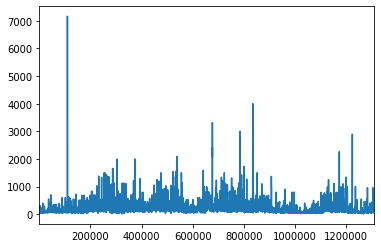

In [11]:
price_df['price'].plot()

# Explore Reviews

In [24]:
reviews_df = pd.read_csv('./reviews.csv', parse_dates=['date'])

In [25]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# Ideas

### Idea 1 - See if listings are above/below expected listing for a given property/date etc, then check if the reviews are positively/negatively correlated based on this

### Idea 2 - How do dates affect pricing? Perhaps split out by low-/mid-/high- end properties

### Idea 3 - Does number of reviews have any effect, are there trends in people being more highly reviewed as they become more experienced?

### Idea 4 - How do reviews compare across different cost properties, eg are they positively correlated, do they vary less at the high-end?

### Idea 5 - Does host-flexibility (e.g. requires guest pic/phone/license etc) affect pricing/reviews/host-acceptance-time or rate?

### Idea 6 - How much do extra bathrooms matter?

### Idea 7 - Predict weekly and monthly price from daily